In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#anatomic_connectivities =pd.read_csv('/Users/samsonkoelle/cm_zack_layer6merge_strength.csv', index_col = 0)

In [121]:
wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv', index_col = [0],  header=[0, 1])

In [122]:
nonzero_ind = np.where(np.sum(wt_conn, axis = 1) > 0)[0]
wt_conn_nonzero = wt_conn.iloc[nonzero_ind]

In [123]:
wt_conn_nonzero_log = np.log(wt_conn_nonzero)

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [124]:
wt_conn_nonzero_log.iloc[np.where(np.isinf(wt_conn_nonzero_log))] = -6

In [192]:
major_ontoloogy = np.load('/Users/samsonkoelle/ontological_order_leaves_majors_names.npy')

In [193]:
major_ontoloogy_nonzero = np.asarray(major_ontoloogy)[nonzero_ind]

In [127]:
xticknames = wt_conn.columns.get_level_values('second')

In [194]:
# major_pal = sns.cubehelix_palette(np.unique(major_ontoloogy_nonzero).size,
#                                     light=.9, dark=.1, reverse=True,
#                                     start=1, rot=-2)
# major_lut = dict(zip(map(str, np.unique(major_ontoloogy_nonzero)), major_pal))

# major_colors = pd.Series(major_ontoloogy_nonzero).map(major_lut)

# major_colors.index = wt_conn_nonzero_log.index

# row_colors=np.asarray(major_colors)
# #major_colors.index = means_cast.columns

In [196]:
#major_ontoloogy_nonzero.shape

In [403]:
crow = np.zeros((121,4), dtype  =float)

for i in range(121):
    crow[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_nonzero[i]])
    


In [141]:
major_ontoloogy_summary = np.load('/Users/samsonkoelle/ontological_order_summary_majors_names.npy')

In [189]:
#targ_ms = np.concatenate([major_ontoloogy_summary , major_ontoloogy_summary[:286]])

In [188]:
# major_pal = sns.cubehelix_palette(np.unique(targ_ms).size,
#                                     light=.9, dark=.1,
#                                     start=1, rot=1)
# major_lut = dict(zip(map(str, np.unique(targ_ms)), major_pal))

# major_colors = pd.Series(targ_ms).map(major_lut)

# major_colors.index = wt_conn_nonzero_log.columns

# col_colors=np.asarray(major_colors)
# #major_colors.index = means_cast.columns

In [429]:
major_structures = ['CB',
 'CTXsp',
 'HPF',
 'HY',
 'Isocortex',
 'MB',
 'MY',
 'OLF',
 'P',
 'PAL',
 'STR',
 'TH']

In [459]:
cs_col_ipsi = sns.color_palette("Spectral", 12)
cs_col_contra = sns.color_palette("Spectral", 12)



alphad_ipsi_majors = np.hstack([np.asarray(cs_col_contra), np.expand_dims(np.ones(12),1)])
alphad_contra_majors = np.hstack([np.asarray(cs_col_contra), .02*np.expand_dims(np.ones(12),1)])

cs_col_ipsi = alphad_ipsi_majors
cs_col_contra = alphad_contra_majors

cs_col_ipsi_dict = {}
cs_col_contra_dict = {}
for i in range(12):
    cs_col_ipsi_dict[major_structures[i]] = cs_col_ipsi[i]
    cs_col_contra_dict[major_structures[i]] = cs_col_contra[i]

ccol = np.zeros((577,4), dtype  =float)

for i in range(291):
    ccol[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_summary[i]])
    
for i in range(286):
    ccol[i+ 291] = np.asarray(cs_col_contra_dict[major_ontoloogy_summary[:286][i]])
    

In [462]:
import matplotlib.patches as mpatches
import seaborn as sns

reo = [4,7,2,1,10,9,11,3,5,8,6,0]
handles = [mpatches.Patch(color =  cs_col_ipsi_dict[major_structures[i]], label = major_structures[i]) for i in reo]

In [248]:
# import sys
# !{sys.executable} -m pip install seaborn --upgrade

In [250]:
import matplotlib.gridspec as gridspec


In [286]:
import matplotlib as mpl

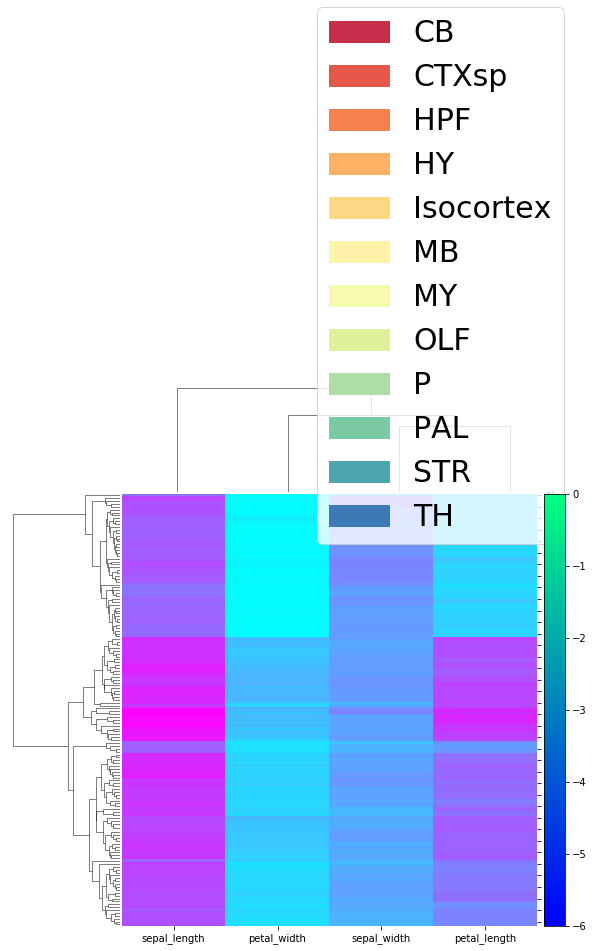

In [399]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
cm = sns.clustermap(iris,cmap = mpl.cm.cool)
cm.cax.set_visible(False)
plt.close(1)
cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.1,0.85),handles = handles, frameon=True, fontsize = 30)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=-6, vmax=0)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
#cm.ax_heatmap.colorbar()
divider = make_axes_locatable(cm.ax_heatmap)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')
fig.tight_layout()
#fig.colorbar(cb1,ax=cm.ax_heatmap)
#fig.add_subplot(cm.cax)

In [401]:
# #fig, axes = plt.subplots(2,1,figsize=(5, 3))
# #outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
# #sns.clustermap(iris)
# cbar_ax = plt.gca()
# #sns.clustermap(data, cbar_ax=cbar_ax)
# cm = sns.clustermap(iris,cmap = mpl.cm.cool)
# cm.cax.set_visible(False)
# cm.gs.update(left=0.05, right=0.45)

# gs2 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
# # create axes within this new gridspec
# ax2 = cm.fig.add_axes([.5,.1,.1,.2], gs2[1:])
# fig.colorbar(im1, cax=ax2, orientation='vertical',aspect=50)

# #plt.close(1)
# #cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.1,0.85),handles = handles, frameon=True, fontsize = 30)

# #cmap = mpl.cm.cool
# #norm = mpl.colors.Normalize(vmin=-6, vmax=0)
# #
# #cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                # norm=norm,
#                                # orientation='horizontal')
# #cb1.set_label('Some Units')
# #cm.ax_heatmap.colorbar()
# #divider = make_axes_locatable(cm.ax_heatmap)
# #cax = divider.append_axes('right', size='5%', pad=1.)
# #fig.colorbar(im1, cax=cax, orientation='vertical')
# #fig.tight_layout()
# #fig.colorbar(cb1,ax=cm.ax_heatmap)
# #fig.add_subplot(cm.cax)

In [322]:
import matplotlib

In [374]:
# iris = sns.load_dataset("iris")
# species = iris.pop("species")

# lut = dict(zip(species.unique(), "rbg"))
# row_colors = species.map(lut)

# #First create the clustermap figure
# g = sns.clustermap(iris, row_colors=row_colors, figsize=(13,8))
# # set the gridspec to only cover half of the figure
# g.gs.update(left=0.05, right=0.45)

# #create new gridspec for the right part
# gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
# # create axes within this new gridspec
# ax2 = g.fig.add_subplot(gs2[0])
# # plot boxplot in the new axes
# sns.boxplot(data=iris, orient="h", palette="Set2", ax = ax2)
# plt.show()

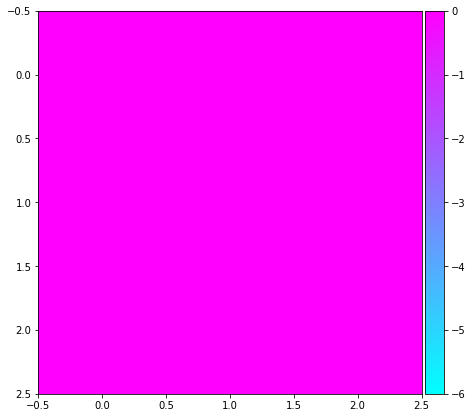

In [371]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

m1 = np.random.rand(3, 3)
m2 = np.arange(0, 3*3, 1).reshape((3, 3))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(m1, interpolation='None',cmap = mpl.cm.cool, vmin = -6, vmax = 0)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
#im1.clim(-6,0)

In [457]:
ccol

array([[0.99546328, 0.84767397, 1.        , 0.01      ],
       [0.99546328, 0.84767397, 1.        , 0.01      ],
       [0.99546328, 0.84767397, 1.        , 0.01      ],
       ...,
       [0.78031526, 0.18216071, 0.29680892, 0.02      ],
       [0.78031526, 0.18216071, 0.29680892, 0.02      ],
       [0.78031526, 0.18216071, 0.29680892, 0.02      ]])

In [472]:
import matplotlib.patches as patches

In [ ]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.000001 

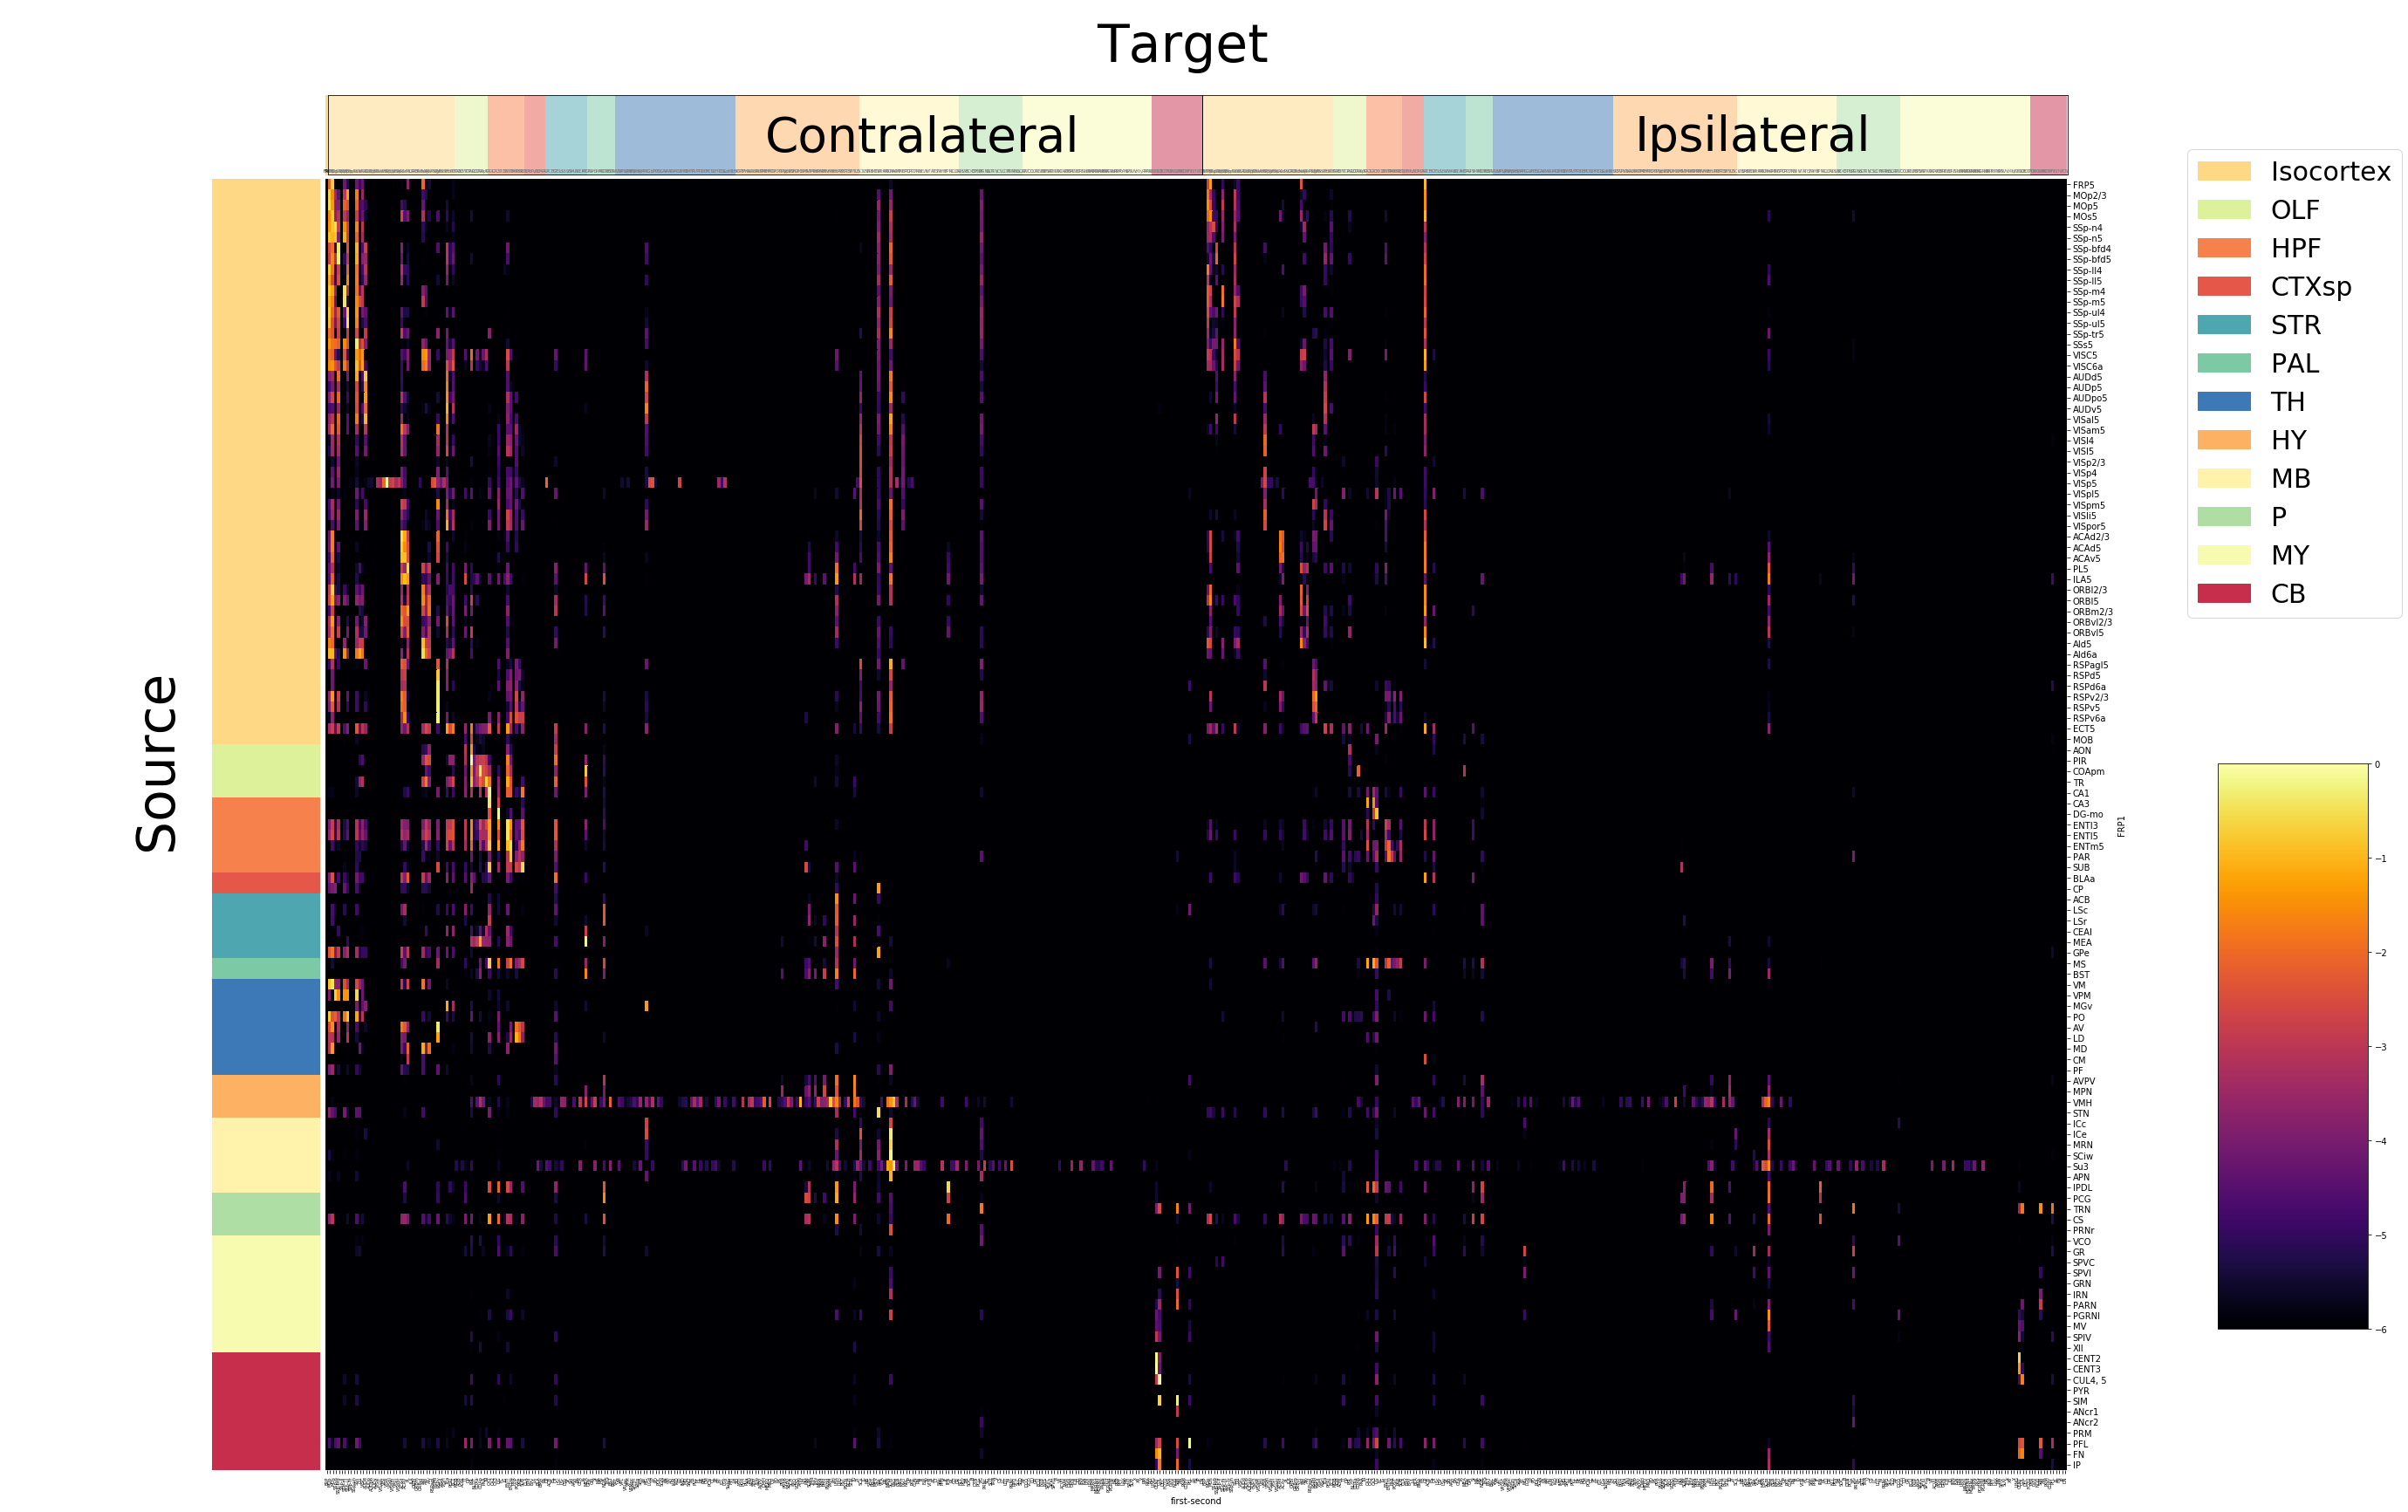

In [530]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
#cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (80,30),
                   cmap = mpl.cm.inferno,
                    )
cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.cax.set_visible(False)
cm.gs.update(left=0.05, right=0.45)
#cm.col_colors = ccol 

# gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
# # create axes within this new gridspec
# ax2 = cm.fig.add_subplot(gs2[0])
# fig.colorbar(im1, cax=ax2, orientation='vertical')

gs2 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
# create axes within this new gridspec
ax2 = cm.fig.add_axes([.48,.2,.03,.3], gs2[1:])
fig.colorbar(im1, cax=ax2, orientation='vertical',aspect=50)

cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)

# gs3 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
ax3 = cm.fig.add_axes([0.278,.8125,.1722,.042], gs2[0]) #x y  width h
ax3.set_xticks([]) 
ax3.set_yticks([]) 
#ax3.set_axis_off()
ax3.set_xticklabels
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
#ax3.plot(range(2), s = .000001)
ax3.text(.5,.3,'Ipsilateral', fontsize = 55)
ax3.patch.set_hatch('/')
ax3.patch.set_alpha(0.5)

ax4 = cm.fig.add_axes([0.104,.8125,.174,.042], gs2[0]) #x y  width heigh
ax4.set_xticks([]) 
ax4.set_yticks([]) 
#ax3.set_axis_off()
ax4.set_xticklabels
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.text(.5,.3,'Contralateral', fontsize = 55)
#ax3.plot(range(2), s = .000001)
ax4.patch.set_hatch('/')
ax4.patch.set_alpha(0.5)


ax5 = cm.fig.add_axes([0.17,.86,.174,.042], gs2[0]) #x y  width heigh
ax5.set_axis_off()
ax5.text(.5,.3,'Target', fontsize = 60)

ax6 = cm.fig.add_axes([0.04,.4,.05,.2], gs2[0]) #x y  width heigh
ax6.set_axis_off()
ax6.text(.5,.3,'Source', fontsize = 60, rotation = 90)
#patches.Rectangle((0.,0.),1.,1.,linewidth=1,edgecolor='r',facecolor='gray')
#patches.Rectangle((0.,0.),1.,1.,linewidth=1,edgecolor='r',facecolor='gray')

# ax3.set_axis_off()
# ax3.text(0,0,'Ipsilateral', fontsize = 30)

# gs3 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
# ax3 = cm.fig.add_axes([0.1,1.1,.2,.3], gs3[0])
# ax3.set_axis_off()
# ax3.text(0,0,'Contralateral', fontsize = 30)
# #plt.close(1)
plt.close(2)
plt.close(3)
plt.close(4)
#plt.close(1)

In [1]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
#cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (80,30),
                   cmap = mpl.cm.inferno,
                    )
cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.cax.set_visible(False)
cm.gs.update(left=0.05, right=0.45)
#cm.col_colors = ccol 

# gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
# # create axes within this new gridspec
# ax2 = cm.fig.add_subplot(gs2[0])
# fig.colorbar(im1, cax=ax2, orientation='vertical')

gs2 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
# create axes within this new gridspec
ax2 = cm.fig.add_axes([.48,.2,.03,.3], gs2[1:])
fig.colorbar(im1, cax=ax2, orientation='vertical',aspect=50)

cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)

# gs3 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
ax3 = cm.fig.add_axes([0.278,.8125,.1722,.042], gs2[0]) #x y  width h
ax3.set_xticks([]) 
ax3.set_yticks([]) 
#ax3.set_axis_off()
ax3.set_xticklabels
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
#ax3.plot(range(2), s = .000001)
ax3.text(.5,.3,'Ipsilateral', fontsize = 55)
ax3.patch.set_hatch('/')
ax3.patch.set_alpha(0.5)

ax4 = cm.fig.add_axes([0.104,.8125,.174,.042], gs2[0]) #x y  width heigh
ax4.set_xticks([]) 
ax4.set_yticks([]) 
#ax3.set_axis_off()
ax4.set_xticklabels
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.text(.5,.3,'Contralateral', fontsize = 55)
#ax3.plot(range(2), s = .000001)
ax4.patch.set_hatch('/')
ax4.patch.set_alpha(0.5)


ax5 = cm.fig.add_axes([0.17,.86,.174,.042], gs2[0]) #x y  width heigh
ax5.set_axis_off()
ax5.text(.5,.3,'Target', fontsize = 60)

ax6 = cm.fig.add_axes([0.04,.4,.05,.2], gs2[0]) #x y  width heigh
ax6.set_axis_off()
ax6.text(.5,.3,'Source', fontsize = 60, rotation = 90)
#patches.Rectangle((0.,0.),1.,1.,linewidth=1,edgecolor='r',facecolor='gray')
#patches.Rectangle((0.,0.),1.,1.,linewidth=1,edgecolor='r',facecolor='gray')

# ax3.set_axis_off()
# ax3.text(0,0,'Ipsilateral', fontsize = 30)

# gs3 = matplotlib.gridspec.GridSpec(2,1, left=0.6)
# ax3 = cm.fig.add_axes([0.1,1.1,.2,.3], gs3[0])
# ax3.set_axis_off()
# ax3.text(0,0,'Contralateral', fontsize = 30)
# #plt.close(1)
plt.close(2)
plt.close(3)
plt.close(4)
#plt.close(1)

NameError: name 'sns' is not defined

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [531]:


# m1 = np.random.rand(3, 3)
# m2 = np.arange(0, 3*3, 1).reshape((3, 3))

# fig = plt.figure(figsize=(16, 12))
# ax1 = fig.add_subplot(121)
# im1 = ax1.imshow(m1, interpolation='None',cmap = mpl.cm.inferno, vmin = -6, vmax = 0)

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im1, cax=cax, orientation='vertical')
# #im1.clim(-6,0)

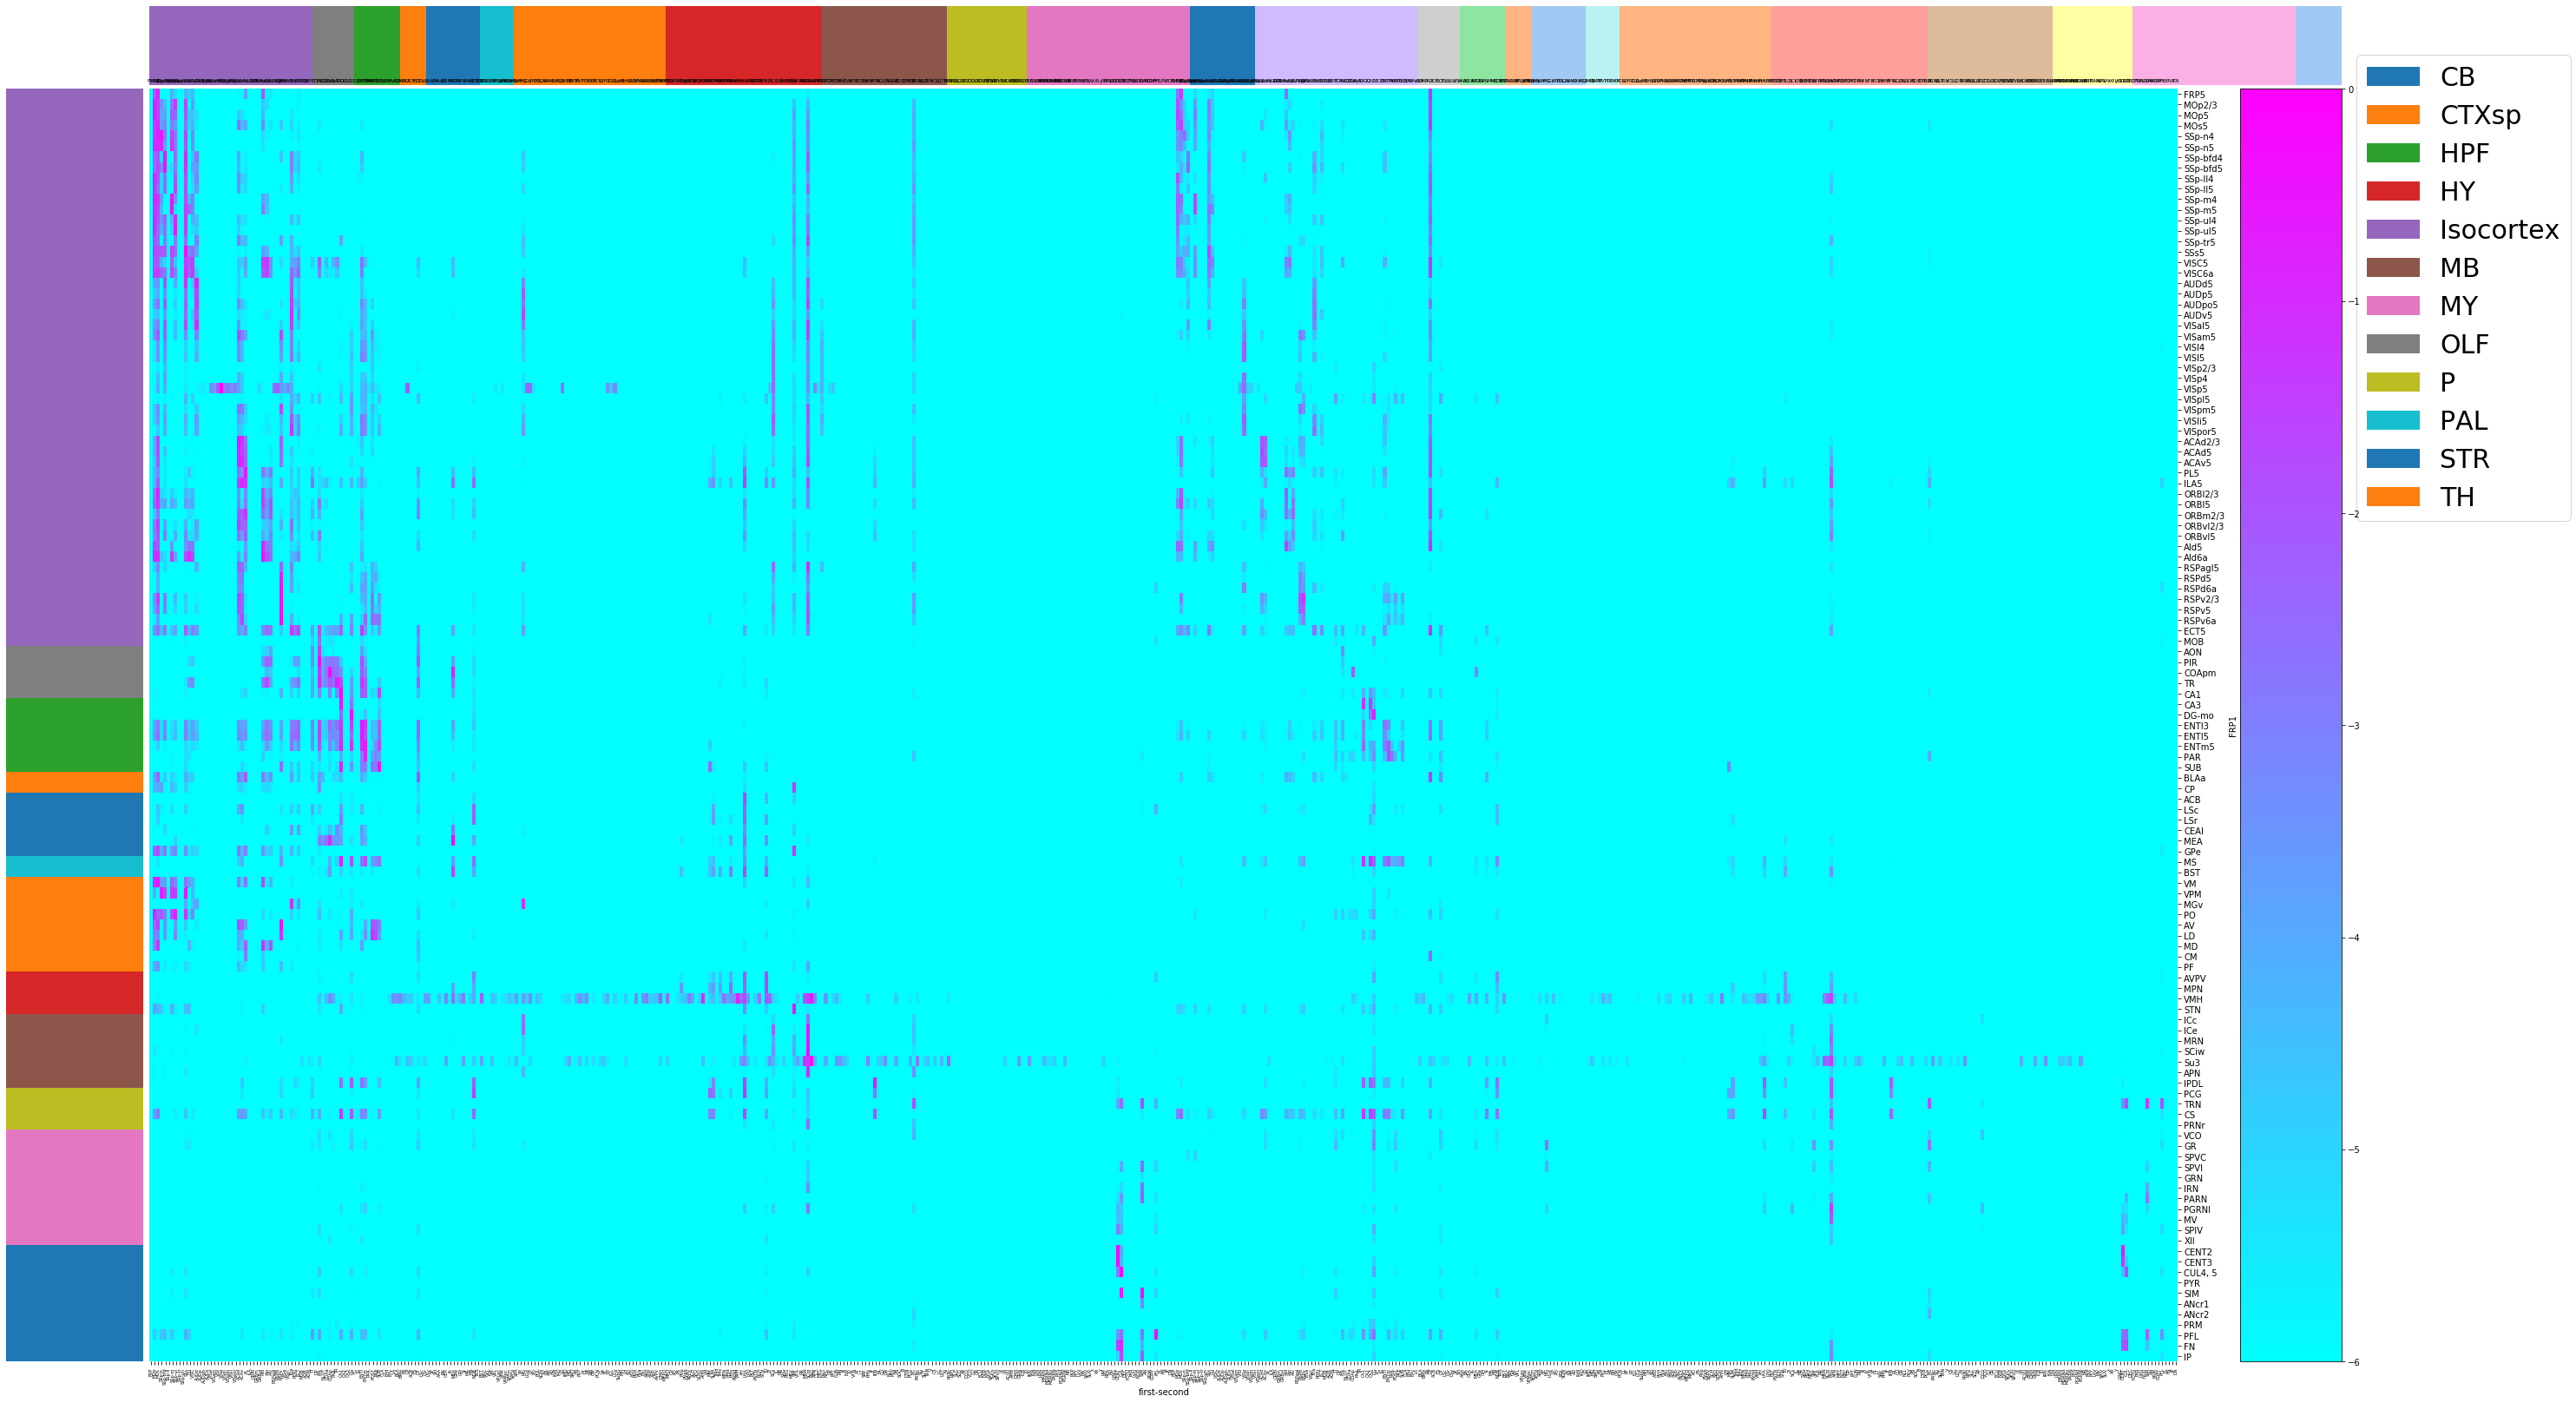

In [314]:
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (60,30),
                   cmap = mpl.cm.cool)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
#plt.legend(loc='right')
cm.fig.subplots_adjust(right=0.8)
cm.cax.set_visible(False)
#cm.ax_cbar.set_position((0.8, .2, .03, .4))
#cm.ax_heatmap.legend('bottom right',bbox_to_anchor=(1.1,0.85),handles = handles, frameon=True, fontsize = 30)
#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)
divider = make_axes_locatable(cm.ax_heatmap)
cax = divider.append_axes('right', size='5%', pad=1.)
fig.colorbar(im1, cax=cax, orientation='vertical')

#l2.set_title(title='Major structure',prop={'size':10})
#ax.set_xticklabels(xticklabels, visible = True, fontsize = 5)

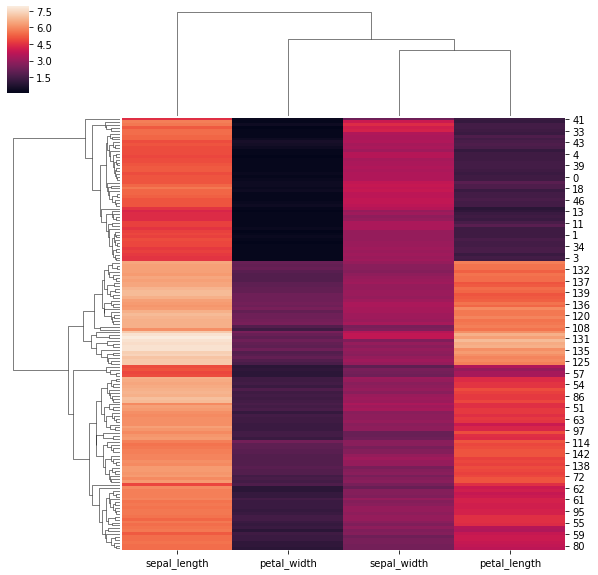

In [216]:
iris = sns.load_dataset('iris')
species = iris.pop("species")
g = sns.clustermap(iris)
#g.fig.subplots_adjust(right=0.7)
#g.ax_cbar.set_position((0.8, .2, .03, .4))
#plt.colorbar(g)

In [212]:
cm.ax_heatmap.legend.h

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x15f390b10>>

In [75]:
xticklabels.shape

(577,)

In [ ]:
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, vmax= 0, vmin = -6, xticklabels=xticknames, row_colors = crow, col_colors = ccol, row_cluster=False , col_cluster = False,figsize = (6,3))
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
#plt.legend(loc='right')
cm.ax_heatmap.legend('bottom right')
#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
cm.ax_heatmap.legend(loc='center right',bbox_to_anchor=(1.1,0.85),handles = handles, frameon=True, fontsize = 30)
#l2.set_title(title='Major structure',prop={'size':10})
#ax.set_xticklabels(xticklabels, visible = True, fontsize = 5)